In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.shape

(200, 4)

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


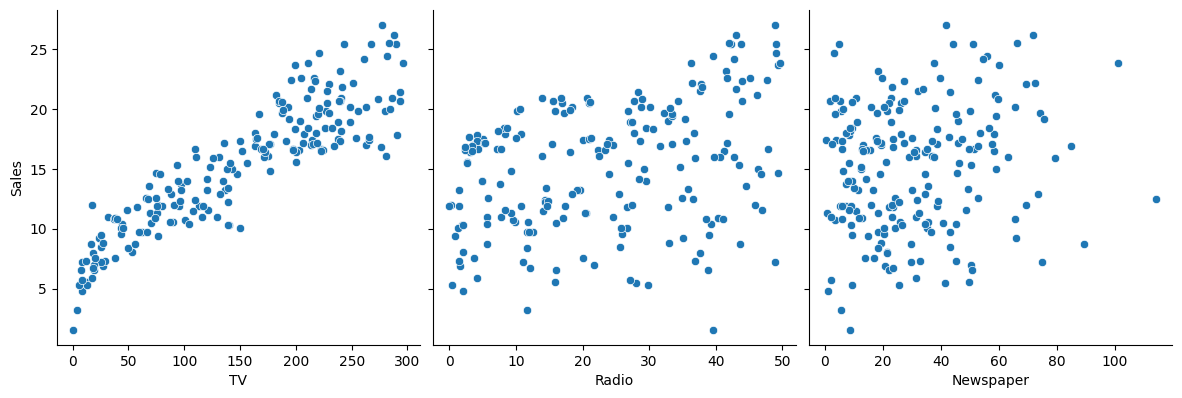

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='scatter', size=4, aspect=1)
plt.show()

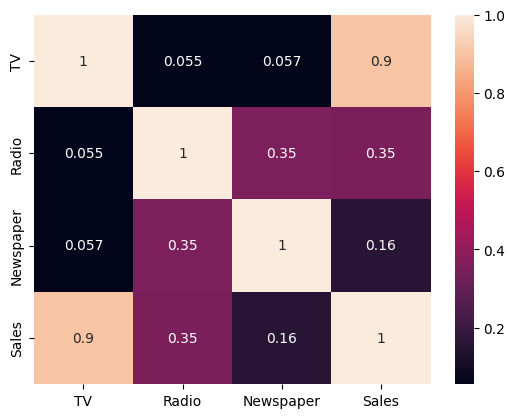

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# multiple linear regression

    # y = m1x(TV) + m2x(Radio) + m3x(Newspaper) + c

# In our case - simple linear regression

    # y = m1x(TV) + c

    # c - intercept
    # m1 - slope (model coefficient / parameter)

In [ ]:
# Data split
x = data['TV']
y = data['Sales']

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Model building - statsmodel or sklearn
import statsmodels.api as sm

# adding constant manually as sm wont have it
x_train_sm = sm.add_constant(x_train)

# fitting the model
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
lr.params

const    7.206555
TV       0.054835
dtype: float64

In [ ]:
# y = 0.054835x(TV) + 7.206555

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.08e-50
Time:                        02:49:34   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

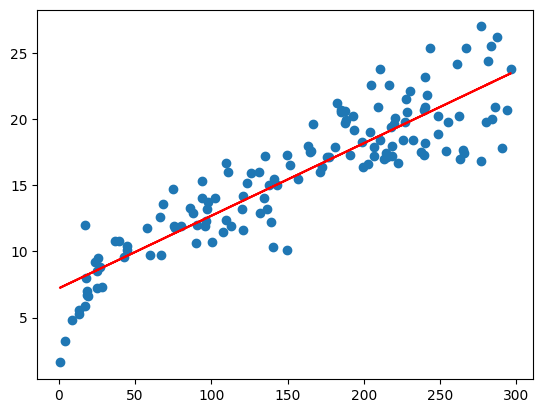

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 7.206555+0.054835*x_train, 'r')
plt.show()

In [ ]:
# RSS
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

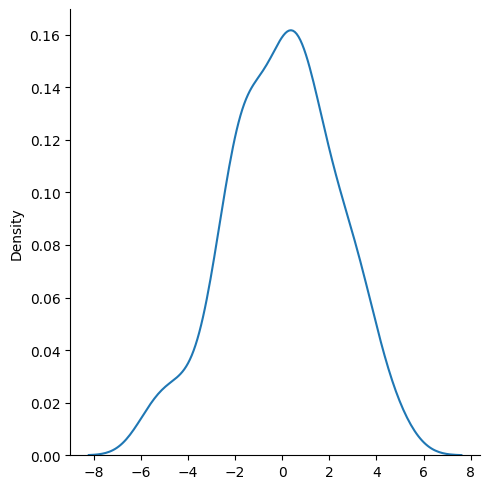

In [ ]:
# residual should be normally distributed
sns.displot(res, kind='kde')
plt.show()

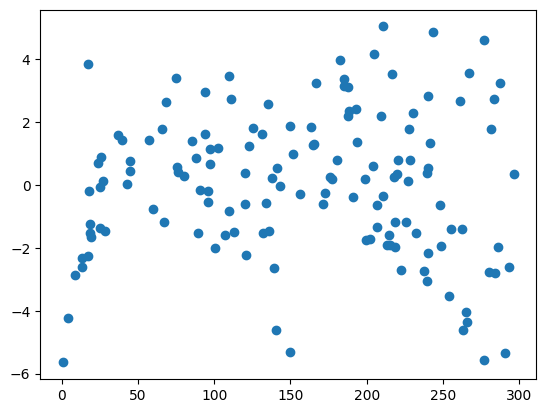

In [ ]:
# there should not be any pattern in the residual
plt.scatter(x_train, res)
plt.show()

In [ ]:
# Prediction
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [ ]:
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [ ]:
# model metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# MSE
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.179525402166655
2.27585706980176


In [ ]:
# checking the r-square value
r_squared = r2_score(y_test, y_pred)
print(round(r_squared, 2))

0.81


## Using sklearn library

In [ ]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train_lm = x_train_lm.values.reshape(-1, 1)
x_test_lm = x_test_lm.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

7.206554548173251
[0.05483488]
